In [34]:
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics

In [4]:
diabetes = datasets.load_diabetes()

In [6]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
diabetes_X = diabetes.data[:, np.newaxis, 2]  #bmi
# diabetes_X

In [13]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [15]:
library = linear_model.LinearRegression()
library.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = library.predict(diabetes_X_test)
library.coef_

array([938.23786125])

In [17]:
def my_linear(x, y):
    n = len(x)
    mx = x.sum()/n
    my = y.sum()/n
    a2 = np.dot(x.T, x)/n
    a11 = np.dot(x.T, y)/n
    k = (a11-mx*my)/(a2-mx**2)
    b = my - k*mx
    return k, b

In [19]:
k, b = my_linear(diabetes_X_train.flatten(), diabetes_y_train)
print(k, b)

938.237861251352 152.91886182616113


In [21]:
df = pd.DataFrame({'Реальный': diabetes_y_test, 'Предсказаный': diabetes_y_pred})
df

,Реальный,Предсказаный
0,233.0,225.973240
1,91.0,115.747634
2,111.0,163.276106
3,152.0,114.736390
4,120.0,120.803854
5,67.0,158.219886
6,310.0,236.085681
7,94.0,121.815098
8,183.0,99.567728
9,66.0,123.837587


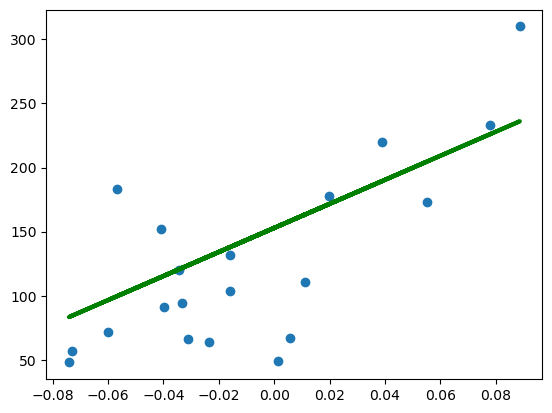

In [23]:
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_y_pred, color='green', linewidth=3)

№ 1.3

In [28]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.47


In [42]:
print("MAE %.2f" % metrics.mean_absolute_error(diabetes_y_test, diabetes_y_pred))

MAE 41.23


In [48]:
print("MAPE %.2f" % (100 * (np.abs(diabetes_y_test - diabetes_y_pred) / diabetes_y_test).mean()))

MAPE 48.68
